In [1]:
import numpy as np 
import pandas as pd 
import sklearn as skl
import matplotlib

import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.cross_validation import train_test_split

%matplotlib inline 

In [2]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (12, 7),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
matplotlib.pylab.rcParams.update(params)

In [3]:
df = pd.read_csv('winequality-red.csv', delimiter=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
attribute = df.columns[:-1]
X = df[attribute]
Y = df.quality
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.4)

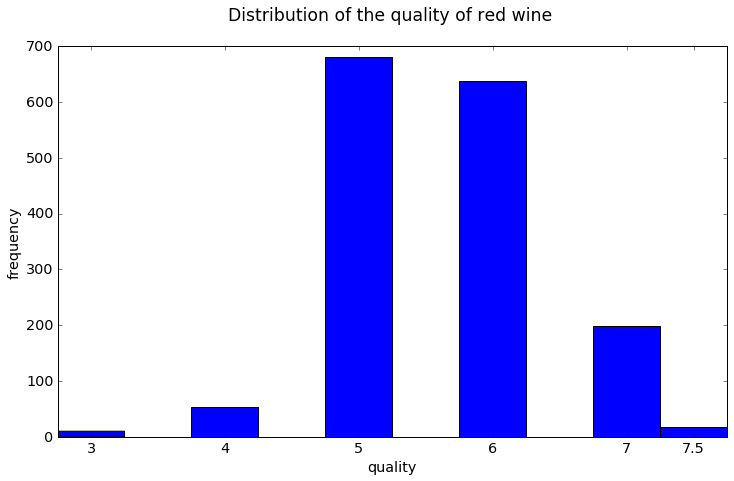

In [5]:
plt.hist(Y)
x1 = [3.25,4.25,5.25,6.25,7.25,7.75]
labels = ['3','4','5','6','7','7.5']
plt.xticks(x1, labels)
plt.xlabel('quality')
plt.ylabel('frequency')
plt.title('Distribution of the quality of red wine \n')
plt.show()

In [6]:
SVR_model   = svm.LinearSVR(epsilon=1,C =1.0,tol=1e-8,)
Lasso_model = skl.linear_model.Lasso(alpha=1)
Ridge_model = skl.linear_model.Ridge()

In [7]:
SVR_model.fit(X_train,Y_train)
Lasso_model.fit(X_train,Y_train)
Ridge_model.fit(X_train,Y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [8]:
Y_SVR   = SVR_model.predict(X_test)
Y_Lasso = Lasso_model.predict(X_test)
Y_Ridge = Ridge_model.predict(X_test)

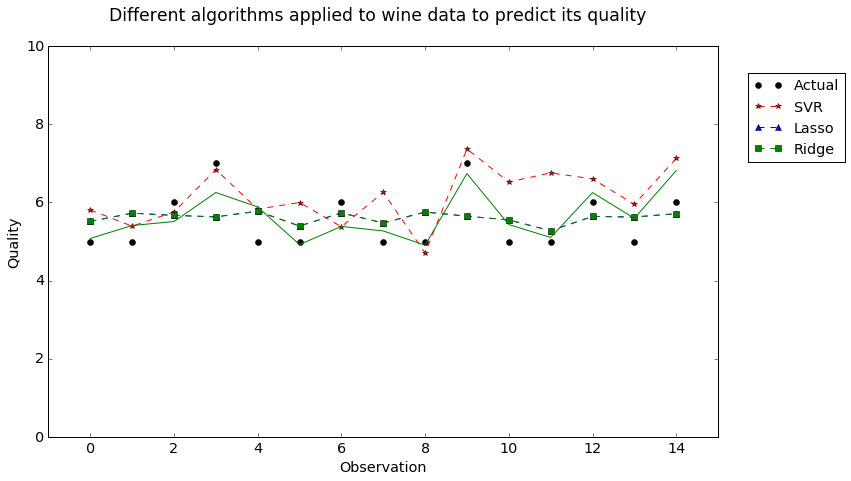

In [9]:
points = 15
xs = range(points)
ax = plt.figure()
plt.plot(xs,Y_test[:points],  'ko',   label = 'Actual')
plt.plot(xs,Y_SVR[:points],   'r*--', label = 'SVR')
plt.plot(xs,Y_Lasso[:points], '^--',label = 'Lasso' )
plt.plot(xs,Y_Lasso[:points], 'gs--',label = 'Ridge' )
plt.plot(xs,Y_Ridge[:points],   )
plt.xlabel('Observation')
plt.ylabel('Quality')
plt.legend(bbox_to_anchor=(1.2, 0.95))
plt.title('Different algorithms applied to wine data to predict its quality  \n')
plt.axis([-1, points, 0,10])
plt.show()